In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,pairwise_distances
from sklearn.preprocessing import StandardScaler

In [39]:
data=pd.read_excel("C:\\Users\\mm\\Desktop\\Online_Retail.xlsx")

In [40]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [41]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [42]:
data.shape

(541909, 8)

In [43]:
data.dropna(inplace=True)

In [44]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
data.shape

(406829, 8)

In [25]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

<Axes: xlabel='Country'>

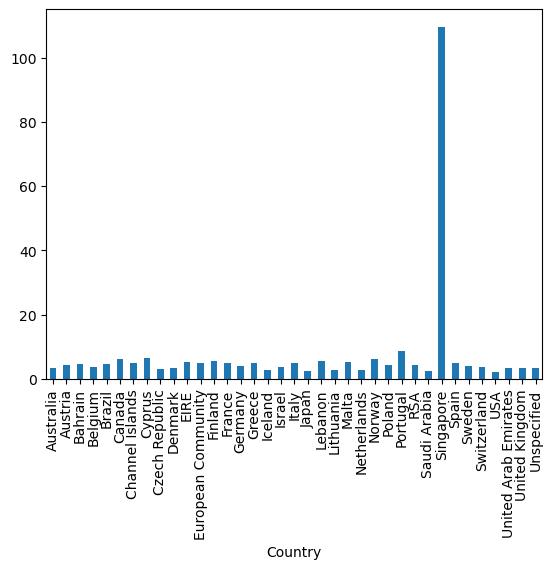

In [25]:
data.groupby('Country')["UnitPrice"].agg(np.mean).plot(kind="bar")

<Axes: >

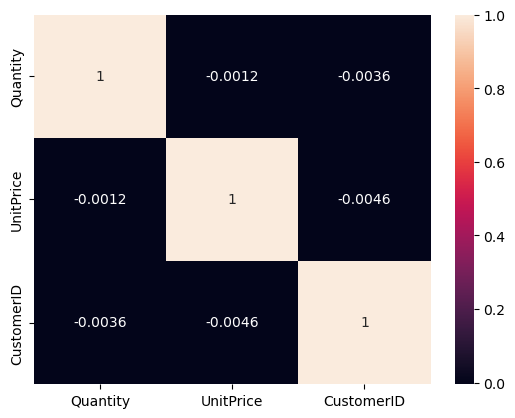

In [24]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

sns.heatmap(data_numeric.corr(),annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


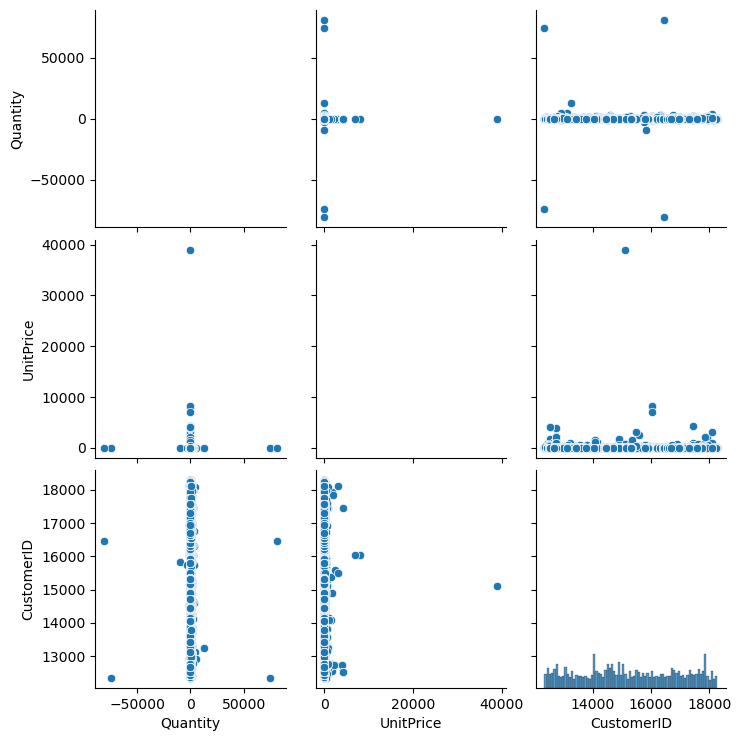

In [26]:
sns.pairplot(data)

<Axes: xlabel='UnitPrice', ylabel='count'>

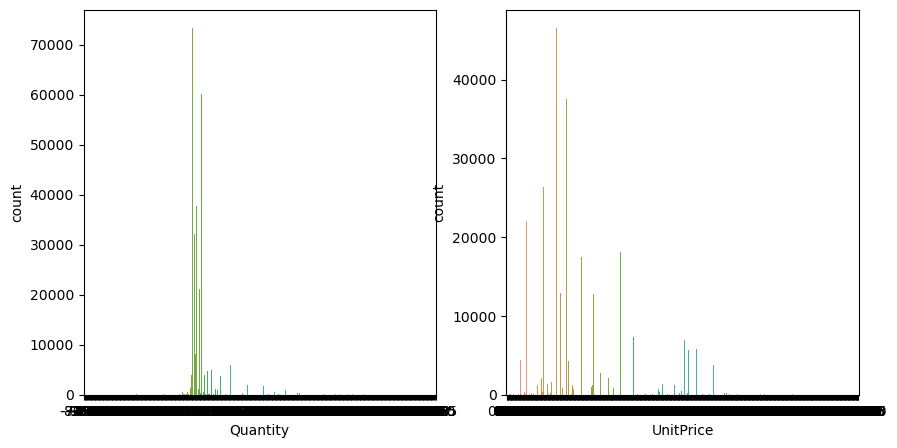

In [31]:
#charts that show all data in one chart
#each chart telling me info about the rating og hotel
g,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x="Quantity",data=data,ax=axes[0])
sns.countplot(x="UnitPrice",data=data,ax=axes[1])

In [46]:
# Convert 'Timestamp' column to numeric representation
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert to datetime type if not already
reference_date = pd.to_datetime('2022-01-01')  # Choose a suitable reference date
data['InvoiceDate'] = (data['InvoiceDate'] - reference_date).dt.days

# Perform one-hot encoding on the 'Country' column
one_hot = pd.get_dummies(data['Country'], prefix='Country')

# Concatenate the one-hot encoded columns with the original dataset
df_encoded = pd.concat([data, one_hot], axis=1)

# Drop the original 'Country' column
df_encoded.drop('Country', axis=1, inplace=True)

pca = PCA(n_components=2)  # Set the desired number of components
features = df_encoded.drop(['CustomerID','StockCode','InvoiceNo','Description'], axis=1)  # Exclude the customer identifier if present
pca_features = pca.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
kmeans_models=[]
max_clusters = 10  # Maximum number of clusters to try
for i in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
    kmeans_models.append(kmeans)


C:\Users\mm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

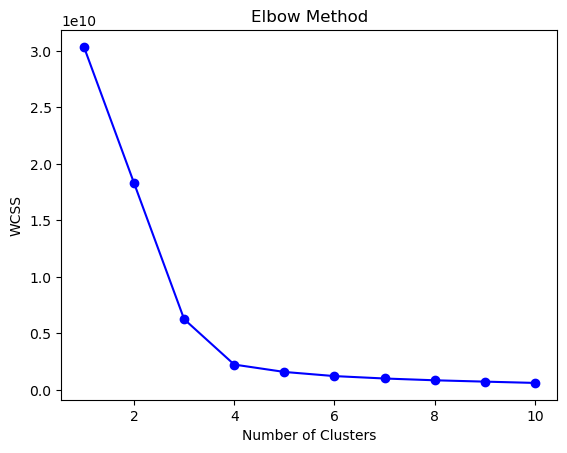

In [47]:
# Plot the elbow curve
plt.plot(range(1, max_clusters+1), wcss,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [58]:
# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 3  # Select the number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_features)
cluster_labels = kmeans.labels_
# Assign cluster labels to each customer
data['Cluster'] = cluster_labels
data['Cluster'] = pd.to_numeric(data['Cluster'])
# Analyze the resulting clusters
cluster_analysis = data['Cluster'].mean()

    

C:\Users\mm\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
# Create a Pandas DataFrame of the cluster labels
cluster_labels = pd.DataFrame(labels, columns=['cluster'])

# Convert the pca_features NumPy array to a Pandas DataFrame
pca_features_df = pd.DataFrame(pca_features)

# Concatenate the pca_features DataFrame with the cluster_labels DataFrame
clustered_data = pd.concat([pca_features_df, cluster_labels], axis=1)

# Calculate the mean and standard deviation of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()
cluster_std = clustered_data.groupby('cluster').std()

# Print the cluster means and standard deviations
print('Cluster means:')
print(cluster_means)
print('Cluster standard deviations:')
print(cluster_std)

Cluster means:
                    0          1
cluster                         
0           -0.000118  -0.000105
1        77617.020681  73.860799
2       -77592.916849 -52.577220
Cluster standard deviations:
                   0           1
cluster                         
0          50.209006  112.849852
1        4794.369727  225.901888
2        4793.994367  233.712817


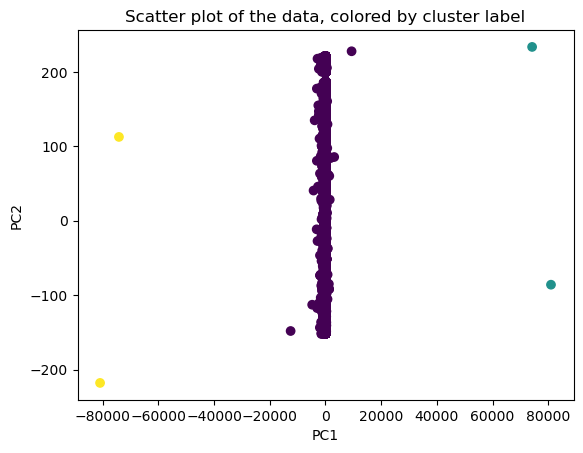

In [20]:
# Create a scatter plot of the data, colored by cluster label
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of the data, colored by cluster label')
plt.show()

In [69]:

# Calculate the cluster average spending
cluster_average_spending = data.groupby(cluster_labels)['UnitPrice'].agg(np.mean)

# Calculate the cluster purchase frequency
cluster_purchase_frequency = data.groupby(cluster_labels)['Quantity'].agg(np.mean)

# Print the results
print(cluster_average_spending)
print(cluster_purchase_frequency)

0    3.46049
1    1.56000
2    1.56000
Name: UnitPrice, dtype: float64
0       12.061422
1   -77605.000000
2    77605.000000
Name: Quantity, dtype: float64


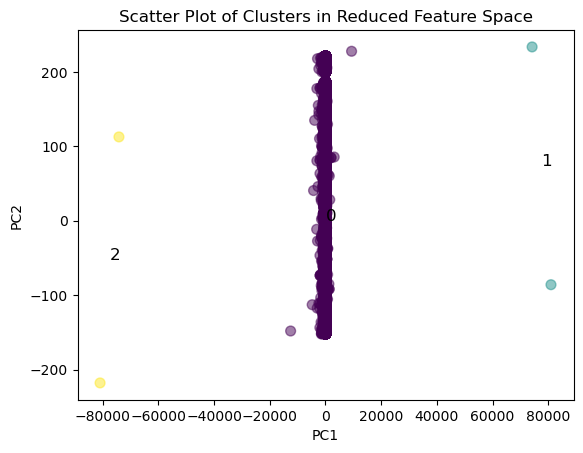

In [73]:
# Create a scatter plot of the clusters in the reduced feature space
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['Cluster'], s=50, alpha=0.5)

# Add labels for each cluster
for i in range(len(data['Cluster'].unique())):
    plt.text(pca_features[data['Cluster'] == i, 0].mean(), pca_features[data['Cluster'] == i, 1].mean(), str(i), fontsize=12)

# Add a title and axis labels
plt.title('Scatter Plot of Clusters in Reduced Feature Space')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()